## Importing Packages

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter

## Loading the data

In [9]:
main_folder_path = 'Data'

# Get the folder names (class labels)
class_labels = os.listdir(main_folder_path)
print(f"Class Labels: {class_labels}")

Class Labels: ['Benign', 'Early', 'Pre', 'Pro']


In [10]:
# Initialize a list to store image paths and their corresponding labels
image_paths = []
labels = []

# Loop through each class folder and gather the image paths and labels
for label in class_labels:
    folder_path = os.path.join(main_folder_path, label)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image_paths.append(image_path)
        labels.append(label)

class_counts = Counter(labels)


## Plotting Class distributions

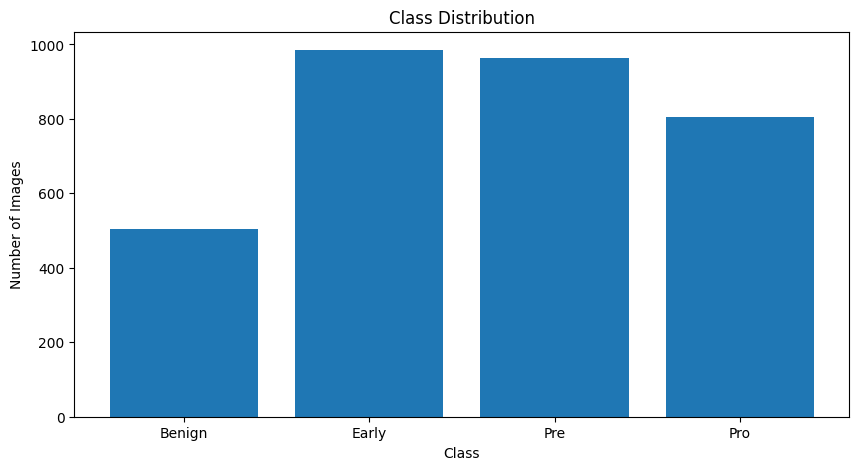

In [11]:
# Plot the distribution of classes
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

## Displaying sample images from each class

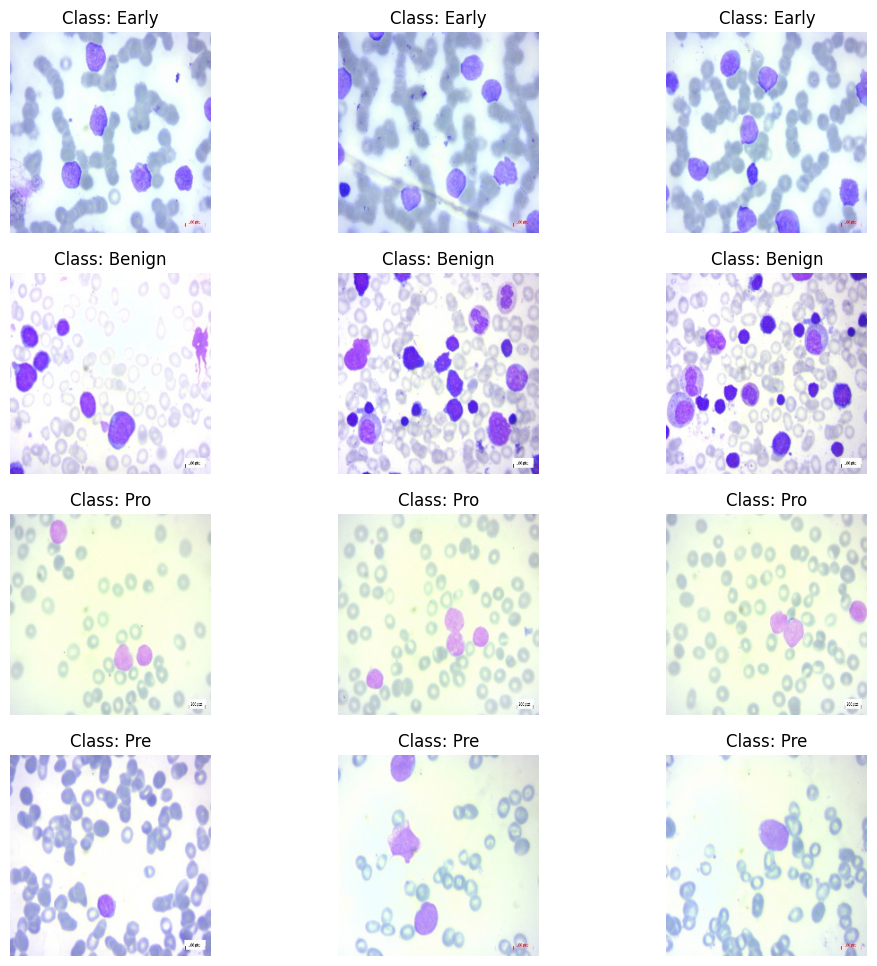

In [12]:
unique_labels = set(labels)
num_samples = 3
plt.figure(figsize=(12, 12))
for idx, label in enumerate(unique_labels):
    label_paths = [path for path, lbl in zip(image_paths, labels) if lbl == label]
    for i in range(num_samples):
        img = Image.open(label_paths[i])
        plt.subplot(len(unique_labels), num_samples, idx * num_samples + i + 1)
        plt.imshow(img)
        plt.title(f"Class: {label}")
        plt.axis('off')
plt.show()

## Check Image shapes

In [13]:
shapes = []
for img_path in image_paths:
    with Image.open(img_path) as img:
        shapes.append(img.size)

print(f"Unique image shapes: {set(shapes)}")


Unique image shapes: {(224, 224)}


## Calculate Statistics

In [14]:
image_arrays = []
for img_path in image_paths:
    with Image.open(img_path) as img:
        img = img.resize((224, 224))  # Resize if necessary
        image_arrays.append(np.array(img))
    
all_images = np.stack(image_arrays)
mean_pixel = np.mean(all_images)
std_pixel = np.std(all_images)
    
print(f"Mean pixel value: {mean_pixel}")
print(f"Standard deviation of pixel values: {std_pixel}")

Mean pixel value: 222.49865009156304
Standard deviation of pixel values: 35.28683737951463


## Data Augmentation